## COVID-19 Logistic Model

Jay Urbain, PhD

References:  

Interview
Ari Libsker, Corona Is Slowing Down, Humanity Will Survive, Says Biophysicist Michael Levitt, 3/13/20.  
https://www.calcalistech.com/ctech/articles/0,7340,L-3800632,00.html

Chowell, G., Sattenspiel, L., Bansal, S., & Viboud, C. (2016). Mathematical models to characterize early epidemic growth: A review. Physics of life reviews, 18, 66–97. https://doi.org/10.1016/j.plrev.2016.07.005

2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE   
https://github.com/CSSEGISandData/COVID-19

Exponential growth and epidemics, CDC  
https://www.youtube.com/watch?v=Kas0tIxDvrg

Estimating actual COVID 19 cases (novel corona virus infections) in an area based on deaths, CDC  
https://www.youtube.com/watch?v=mCa0JXEwDEk  

Mathematics of the Corona outbreak – with professor Tom Britton   
https://www.youtube.com/watch?v=gSqIwXl6IjQ

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [2]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns



#### Data

The data is hosted by John Hopkins University:  
https://github.com/CSSEGISandData/COVID-19

time_series_covid19_confirmed_global.csv

There are three files that contain total confirmed cases, deaths and recoveries.

In [84]:
df_confirmed_raw_new=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed_raw_new.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3


In [85]:
## Read Data for Cases, Deaths and Recoveries
df_confirmed_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [86]:
df_confirmed_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


#### Data Preprocessing

Unpivot the data

In [88]:
# melt df into correct shape 
# index
def unpivot_data(df_raw):
    df_unpivot=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
    df_unpivot['Date'] = pd.to_datetime(df_unpivot['Date'])
    df_unpivot=df_unpivot.set_index(['Date'])
    return df_unpivot 

# Unpivot datasets datasets
df_confirmed=unpivot_data(df_confirmed_raw)
df_deaths=unpivot_data(df_deaths_raw)
df_recovered=unpivot_data(df_recovered_raw)
df_confirmed_new=unpivot_data(df_confirmed_raw_new)


In [89]:
df_confirmed_new.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Afghanistan,33.0000,65.0000,0
2020-01-22,NaN,Albania,41.1533,20.1683,0
2020-01-22,NaN,Algeria,28.0339,1.6596,0
2020-01-22,NaN,Andorra,42.5063,1.5218,0
2020-01-22,NaN,Angola,-11.2027,17.8739,0


In [ ]:
df_confirmed.head()

In [7]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0.0
2020-01-22,NaN,Japan,36.0000,138.0000,0.0
2020-01-22,NaN,Singapore,1.2833,103.8333,0.0
2020-01-22,NaN,Nepal,28.1667,84.2500,0.0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0.0


In [8]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0.0
2020-01-22,NaN,Japan,36.0000,138.0000,0.0
2020-01-22,NaN,Singapore,1.2833,103.8333,0.0
2020-01-22,NaN,Nepal,28.1667,84.2500,0.0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0.0


List countries

In [9]:
np.sort(df_confirmed['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadelo

In [10]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2.0
2020-01-22,NaN,Japan,36.0000,138.0000,2.0
2020-01-22,NaN,Singapore,1.2833,103.8333,0.0
2020-01-22,NaN,Nepal,28.1667,84.2500,0.0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0.0


In [11]:
df_confirmed[df_confirmed['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,France,France,46.2276,2.2137,0.0
2020-01-22,St Martin,France,18.0708,-63.0501,0.0
2020-01-22,Saint Barthelemy,France,17.9000,-62.8333,0.0
2020-01-22,French Polynesia,France,-17.6797,149.4068,0.0
2020-01-22,French Guiana,France,3.9339,-53.1258,0.0
...,...,...,...,...,...
2020-03-23,French Guiana,France,3.9339,-53.1258,0.0
2020-03-23,Mayotte,France,-12.8275,45.1662,0.0
2020-03-23,Guadeloupe,France,16.2500,-61.5833,0.0


In [12]:
df_confirmed[df_confirmed['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Channel Islands,United Kingdom,49.3723,-2.3644,0.0
2020-01-22,Gibraltar,United Kingdom,36.1408,-5.3536,0.0
2020-01-22,United Kingdom,United Kingdom,55.3781,-3.4360,0.0
2020-01-22,Cayman Islands,United Kingdom,19.3133,-81.2546,0.0
2020-01-22,Montserrat,United Kingdom,16.7425,-62.1874,0.0
...,...,...,...,...,...
2020-03-23,United Kingdom,United Kingdom,55.3781,-3.4360,5683.0
2020-03-23,Cayman Islands,United Kingdom,19.3133,-81.2546,3.0
2020-03-23,Montserrat,United Kingdom,16.7425,-62.1874,1.0


In [13]:
df_confirmed_us = df_confirmed[df_confirmed['Country/Region'] == 'US']
df_confirmed_us

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Washington,US,47.4009,-121.4905,0.0
2020-01-22,New York,US,42.1657,-74.9481,0.0
2020-01-22,California,US,36.1162,-119.6816,0.0
2020-01-22,Massachusetts,US,42.2302,-71.5301,0.0
2020-01-22,Diamond Princess,US,35.4437,139.6380,0.0
...,...,...,...,...,...
2020-03-23,Puerto Rico,US,18.2208,-66.5901,23.0
2020-03-23,Guam,US,13.4443,144.7937,27.0
2020-03-23,Virgin Islands,US,18.3358,-64.8963,NaN


In [14]:
df_confirmed_us_total = pd.DataFrame(df_confirmed_us.groupby(df_confirmed_us.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_us_total['Country/Region'] = 'US Total'
df_confirmed_us_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,1.0,US Total
2020-01-23,1.0,US Total
2020-01-24,2.0,US Total
2020-01-25,2.0,US Total
2020-01-26,5.0,US Total
2020-01-27,5.0,US Total
2020-01-28,5.0,US Total
2020-01-29,5.0,US Total
2020-01-30,5.0,US Total


In [15]:
df_confirmed = df_confirmed.append(df_confirmed_us_total)
df_confirmed

/Users/jayurbain/anaconda3/envs/pytorch_rl/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2.0,Thailand,15.0000,101.0000,NaN
2020-01-22,2.0,Japan,36.0000,138.0000,NaN
2020-01-22,0.0,Singapore,1.2833,103.8333,NaN
2020-01-22,0.0,Nepal,28.1667,84.2500,NaN
2020-01-22,0.0,Malaysia,2.5000,112.5000,NaN
...,...,...,...,...,...
2020-03-19,13677.0,US Total,NaN,NaN,NaN
2020-03-20,19100.0,US Total,NaN,NaN,NaN
2020-03-21,25489.0,US Total,NaN,NaN,NaN


#### China Total

In [16]:
df_confirmed_china = df_confirmed[df_confirmed['Country/Region'] == 'China']
df_confirmed_china

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,444.0,China,30.9756,112.2707,Hubei
2020-01-22,26.0,China,23.3417,113.4244,Guangdong
2020-01-22,5.0,China,33.8820,113.6140,Henan
2020-01-22,10.0,China,29.1832,120.0934,Zhejiang
2020-01-22,4.0,China,27.6104,111.7088,Hunan
...,...,...,...,...,...
2020-03-23,75.0,China,44.0935,113.9448,Inner Mongolia
2020-03-23,75.0,China,37.2692,106.1655,Ningxia
2020-03-23,18.0,China,35.7452,95.9956,Qinghai


In [17]:
df_confirmed_china_total = pd.DataFrame(df_confirmed_china.groupby(df_confirmed_china.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_china_total['Country/Region'] = 'China Total'
df_confirmed_china_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,548.0,China Total
2020-01-23,643.0,China Total
2020-01-24,920.0,China Total
2020-01-25,1406.0,China Total
2020-01-26,2075.0,China Total
2020-01-27,2877.0,China Total
2020-01-28,5509.0,China Total
2020-01-29,6087.0,China Total
2020-01-30,8141.0,China Total


In [18]:
df_confirmed = df_confirmed.append(df_confirmed_china_total)
df_confirmed

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2.0,Thailand,15.0000,101.0000,NaN
2020-01-22,2.0,Japan,36.0000,138.0000,NaN
2020-01-22,0.0,Singapore,1.2833,103.8333,NaN
2020-01-22,0.0,Nepal,28.1667,84.2500,NaN
2020-01-22,0.0,Malaysia,2.5000,112.5000,NaN
...,...,...,...,...,...
2020-03-19,81156.0,China Total,NaN,NaN,NaN
2020-03-20,81250.0,China Total,NaN,NaN,NaN
2020-03-21,81305.0,China Total,NaN,NaN,NaN


Cap date range to today to eliminate spurious data

In [19]:
from datetime import date
max_date = date.today()
max_date

datetime.date(2020, 3, 24)

In [20]:
df_confirmed.index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-23T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [21]:
df_confirmed[df_confirmed['Country/Region']=='US'].index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-23T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [22]:
min_date_string = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
max_date_string = np.datetime_as_string(df_confirmed.index.values.max(), unit='D')

In [23]:
df_confirmed.head()

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2.0,Thailand,15.0000,101.0000,NaN
2020-01-22,2.0,Japan,36.0000,138.0000,NaN
2020-01-22,0.0,Singapore,1.2833,103.8333,NaN
2020-01-22,0.0,Nepal,28.1667,84.2500,NaN
2020-01-22,0.0,Malaysia,2.5000,112.5000,NaN


#### US Confirmed Cases

Total and percent change

In [24]:
min_cases = 50

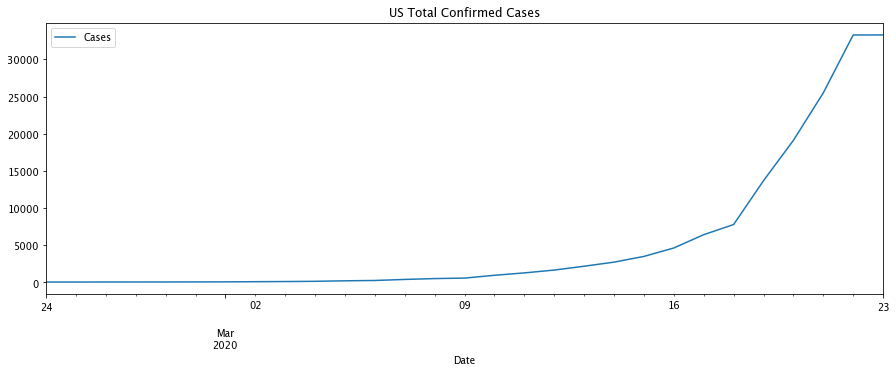

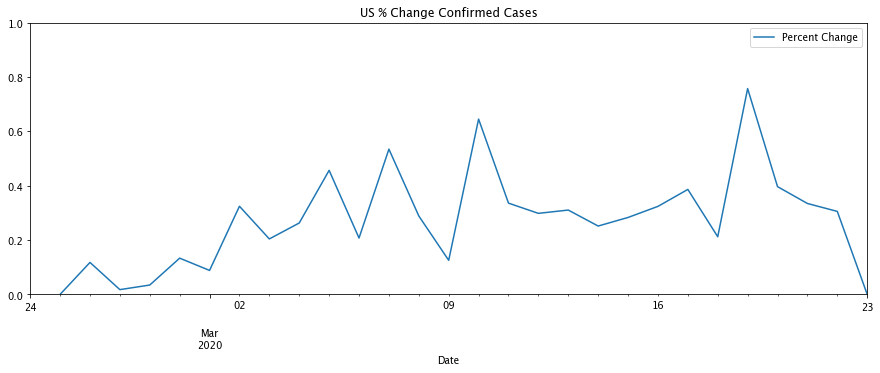

In [25]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')
plt.show()
df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='US % Change Confirmed Cases', ylim=(0,1.0)); 


#### US Polyfit,  Median Filter,  % Change, Testing

US Testing data

In [26]:
df_state_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/us-daily.csv')
df_us_testing=df_state_raw.set_index(['date'])
df_us_testing

,states,positive,negative,posNeg,pending,death,total
date,,,,,,,
20200304,14,118,748,866,103,NaN,969
20200305,24,176,971,1147,197,NaN,1344
20200306,36,223,1617,1840,458,NaN,2298
20200307,51,341,1863,2204,602,NaN,2806
20200308,51,417,2437,2854,347,NaN,3201
20200309,51,584,3500,4084,313,NaN,4397
20200310,51,778,3807,4585,469,NaN,4889
20200311,51,1053,5978,7031,563,27.0,7617
20200312,51,1315,7950,9265,673,36.0,9873


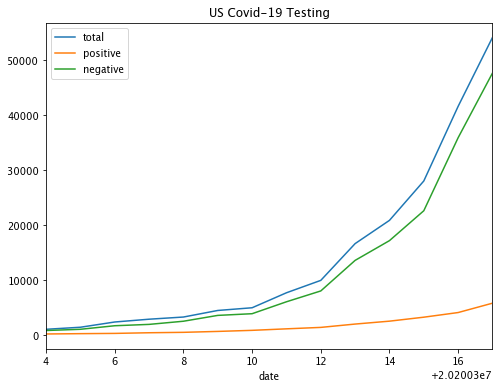

In [27]:
df_us_testing[['total','positive','negative']].plot(figsize=(8,6), title='US Covid-19 Testing');

In [28]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([-9.14237171e-06,  5.07951149e-04, -1.03995376e-02,  1.04771768e-01,
       -1.45158265e-01])

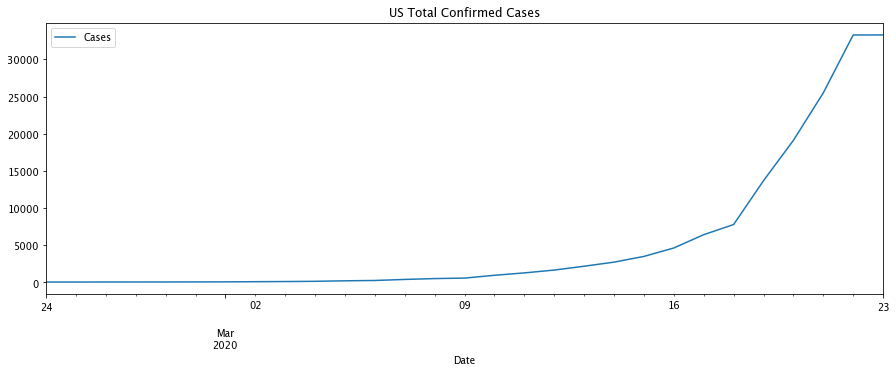

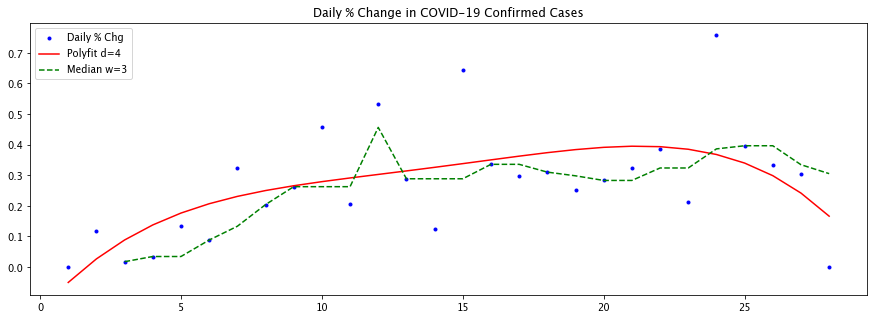

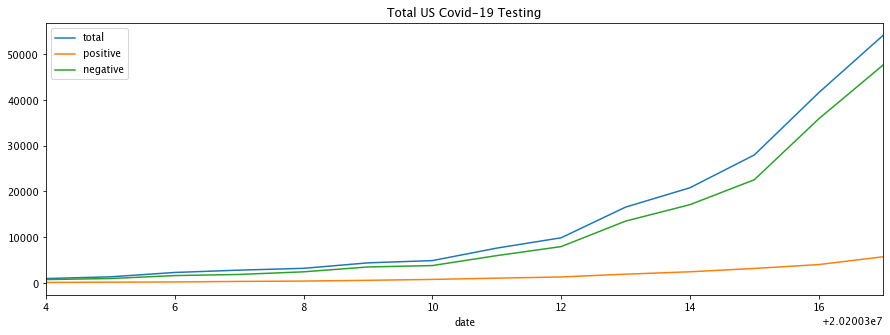

In [29]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.set_title('Daily % Change in COVID-19 Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
leg = ax.legend(loc='upper left', frameon=True);
plt.show()

df_us_testing[['total','positive','negative']].plot(title='Total US Covid-19 Testing');


#### China Confirmed Cases

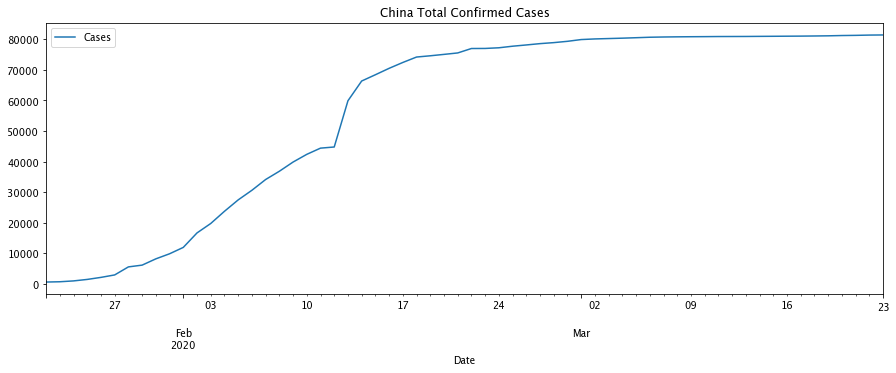

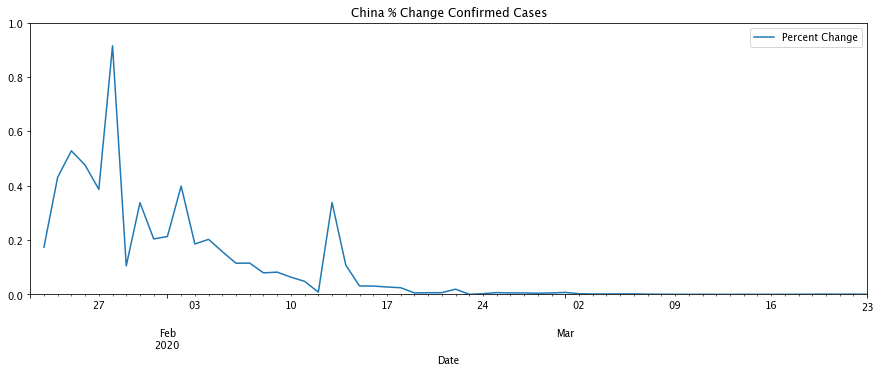

In [30]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='China % Change Confirmed Cases', ylim=(0,1.0)); 


#### China Polyfit and Median Filter % Change

In [31]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([-1.96834271e-07,  2.04624759e-05, -3.53994246e-04, -1.80786590e-02,
        4.74823821e-01])

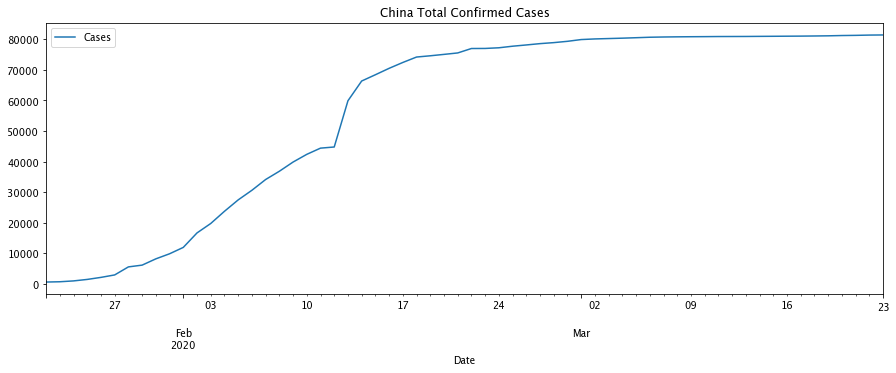

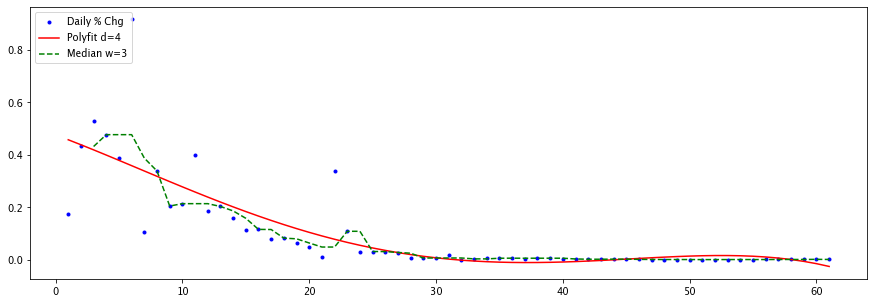

In [32]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True);

#### South Korea Confirmed Cases

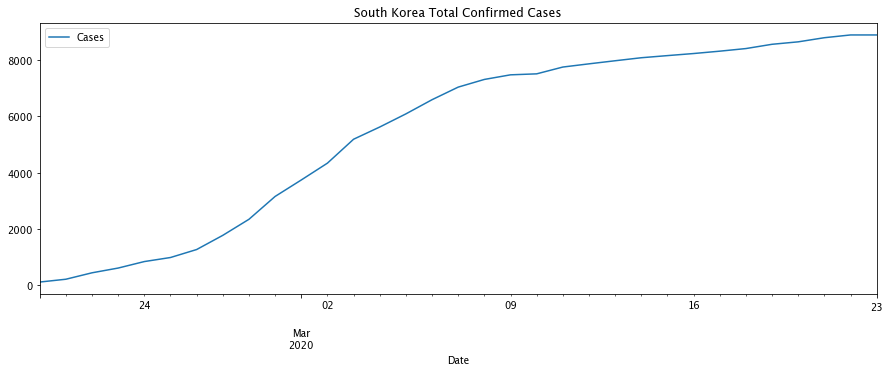

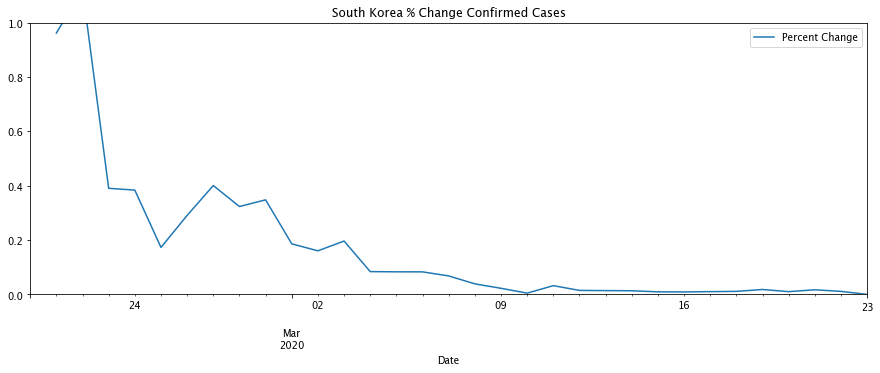

In [33]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='South Korea % Change Confirmed Cases', ylim=(0,1.0)); 


#### South Korea Polyfit and Median Filter % Change

In [34]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]

df = df_country['Cases'].to_frame('Cases').reset_index()[1:]
df
x = df.index
y = df['Cases']
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 7.53181702e-02, -5.25843536e+00,  1.09829455e+02, -3.26861251e+02,
        5.44897734e+02])

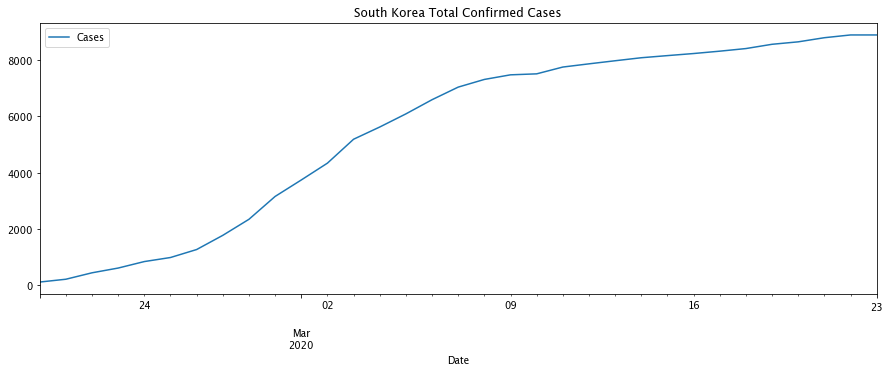

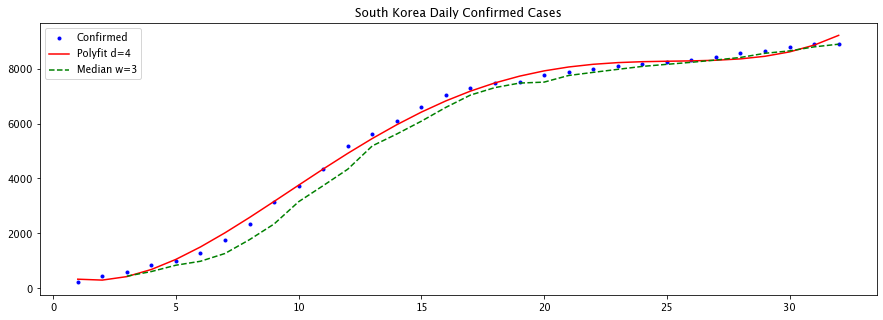

In [35]:
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily Confirmed Cases')
ax.plot(x, y, '.b', label='Confirmed')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True);



In [36]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 7.71606730e-06, -6.01220444e-04,  1.70713507e-02, -2.17970855e-01,
        1.15568415e+00])

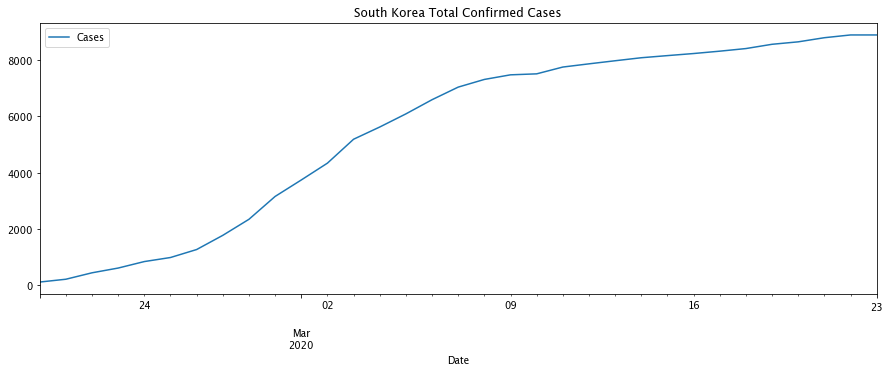

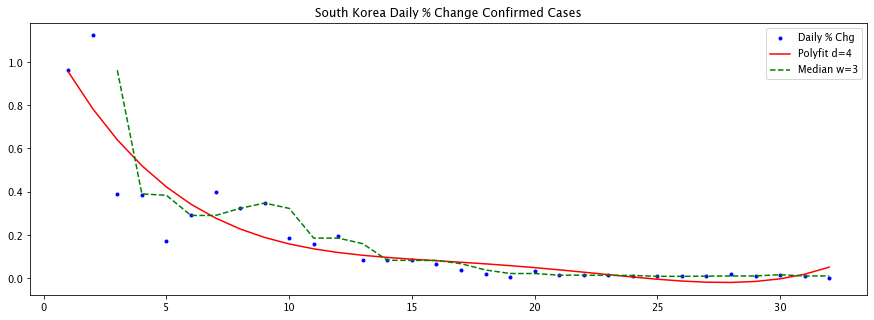

In [37]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily % Change Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper right', frameon=True);

## Logistic Modeling

The logistic model has been widely used to describe population growth such as the spread of a virus through the population. 

$$
f(x,a,b,c) = \dfrac{c}{1 + e^{-(x-b)/a}}
$$

- $x$ = time (days)
- $a$ = infection speed
- $b$ = inflection point (days), day with max rate of new infections 
- $c$ = total number of recorded infected people at the end

The number of infected people eventually gets close $c$ where the infection has ended. 

The inflection point $b$, is the point at which the rate of infection starts to decrease (max first derivative).

A plot of a generic logistic function is shown below.

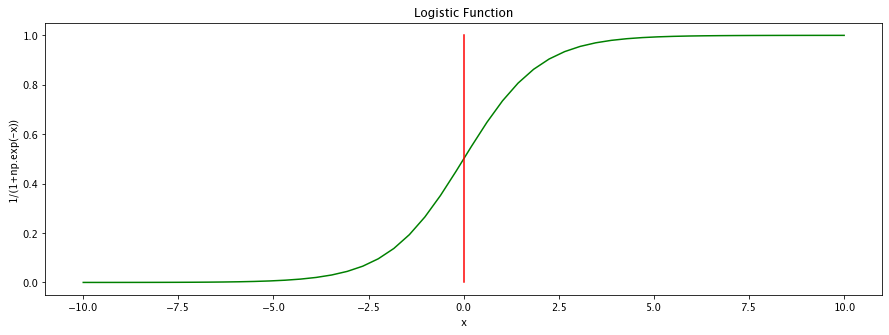

In [38]:
x = np.linspace(-10, 10)
y = 1/(1+np.exp(-x))
plt.plot(x,y, color="green")
# plt.plot(x, [0.5]*50, color="red")
plt.plot(np.array([0,0]), np.array([0,1]), color="red")
plt.title("Logistic Function")
plt.xlabel("x")
plt.ylabel("1/(1+np.exp(-x))")
plt.show()


The rate of infection increases rapidly until it reaches an inflection point shown by the intersection of the red line. Then eventually levels off.

In [130]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [132]:
df_confirmed=df_confirmed_new

#### Curve fit using South Korea

In [133]:
min_cases=0
df_sk = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_sk

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,"Korea, South",36.0,128.0,1
2020-01-23,NaN,"Korea, South",36.0,128.0,1
2020-01-24,NaN,"Korea, South",36.0,128.0,2
2020-01-25,NaN,"Korea, South",36.0,128.0,2
2020-01-26,NaN,"Korea, South",36.0,128.0,3
...,...,...,...,...,...
2020-03-19,NaN,"Korea, South",36.0,128.0,8565
2020-03-20,NaN,"Korea, South",36.0,128.0,8652
2020-03-21,NaN,"Korea, South",36.0,128.0,8799


In [134]:
df = df_sk['Cases'].to_frame('Cases').reset_index()[:]
df
x = df.index
y = df['Cases']
fit = curve_fit(logistic_model,x,y,p0=[2,100,15000])

Below `popt` contains the learned parameters, a, b, c. `pcov` is the covariance matrix, whose diagonal values are the variances of the parameters.

In [135]:
popt = fit[0] # optimized parameters
pcov = fit[1] # covariance matrix
           
a = popt[0]
b = popt[1]
c = popt[2]

In [136]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("c =", popt[2], "+/-", pcov[2,2]**0.5)

a = 3.2160199137787076 +/- 0.08242431748478275
b = 40.004515752765855 +/- 0.09768208056355562
c = 8495.732296012353 +/- 49.29347338172584


The square root of the variances provides the Standard Error for each learned parameter, a, b, and c respectively.

In [137]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.08242431748478275, 0.09768208056355562, 49.29347338172584]

In [138]:
print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))
      

Expected number of infected people at infection end: 8495.73 +/- 49.29
Infection peak in days from start: 40.0 +/- 0.1


In [139]:
import numpy as np
infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
infection_peak_date

numpy.datetime64('2020-03-02T00:00:00.000000000')

In [140]:
infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
infection_peak_date_string

'2020-03-02'

Calculate infection end day as the day at which the cumulative total infected count is equal to the `c` parameter.

The model can be used with Scipy fsolve function which will find the root of the equation that defines the infection end day.

In [141]:
d = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
d

70

In [142]:
infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
infection_end_date_string

'2020-04-01'

#### Plot fitted logistic function with actual data

In [143]:
df_confirmed = df_confirmed_new

In [144]:
min_date = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
min_date

'2020-01-22'

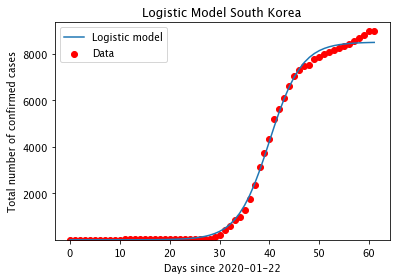

In [145]:
plt.scatter(x, y, color="red", label="Data")

# Fitted logistic curve
plt.plot(x, [logistic_model(i, popt[0], popt[1], popt[2]) for i in x], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.ylim((min(y)*0.9,c*1.1))
plt.title('Logistic Model South Korea')
plt.show()

#### Summary South Korea Model

In [146]:
df = df_sk['Cases'].to_frame('Cases').reset_index()[:]
df
x_sk = df.index
y_sk = df['Cases']
fit = curve_fit(logistic_model,x_sk,y_sk,p0=[2,25,300000])

popt_sk = fit[0] # optimized parameters
pcov_sk = fit[1] # covariance matrix
           
a = popt_sk[0]
b = popt_sk[1]
c = popt_sk[2]

print("a =", popt_sk[0], "+/-", pcov_sk[0,0]**0.5)
print("b =", popt_sk[1], "+/-", pcov_sk[1,1]**0.5)
print("c =", popt_sk[2], "+/-", pcov_sk[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_sk : logistic_model(x_sk,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)


a = 3.2160139609069285 +/- 0.08242361595671199
b = 40.004509382747344 +/- 0.09768111331379802
c = 8495.72946359786 +/- 49.29298661089341
errors [0.08242361595671199, 0.09768111331379802, 49.29298661089341]
Expected number of infected people at infection end: 8495.73 +/- 49.29
Infection peak in days from start: 40.0 +/- 0.1
infection_peak_date 2020-03-02T00:00:00.000000000
infection_peak_date_string
days end 70
infection_end_date_string 2020-04-01


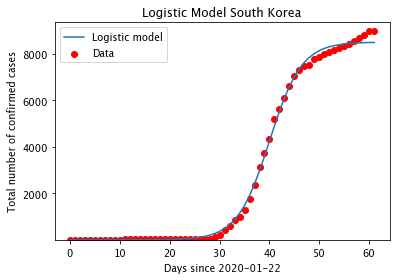

In [147]:
plt.scatter(x_sk, y_sk, color="red", label="Data")

# Fitted logistic curve
plt.plot(x_sk, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]) for i in x_sk], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.ylim((min(y)*0.9,c*1.1))
plt.title('Logistic Model South Korea')
plt.savefig('Logistic Model South Korea.png')

plt.show()

#### Logistic Model US

In [150]:
df_confirmed.loc[(df_confirmed['Country/Region'] == 'US')].head()


,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,US,37.0902,-95.7129,1
2020-01-23,NaN,US,37.0902,-95.7129,1
2020-01-24,NaN,US,37.0902,-95.7129,2
2020-01-25,NaN,US,37.0902,-95.7129,2
2020-01-26,NaN,US,37.0902,-95.7129,5


In [151]:
min_cases = 0
df_us = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US') & (df_confirmed['Cases'] >= min_cases)]
df_us = df_us['Cases'].to_frame('Cases').reset_index()[:]
df_us

,Date,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
57,2020-03-19,13677
58,2020-03-20,19100
59,2020-03-21,25489
60,2020-03-22,33276


In [152]:
pop_dict = {'US Total':331002651,
    'Japan':126476461,
    'Germany':83783942,
    'United Kingdom':67886011,
    'France':6273511,
    'Italy':60461826,
    'Korea, South':51269185,
    'Spain':46754778,
    'Argentina':45195774,
    'Canada':37742154,
    'Australia':25499884,
    'Taiwan':23816775,
    'Iran':8992949,
    'Brazil':209469333,
    'Colombia':49648685,
    'Mexico':126190788,
    'China':1439323776,
    'China Hubei':75600000
}

In [153]:
us_sk_pop_factor = pop_dict['US Total']/pop_dict['Korea, South']
us_sk_pop_factor

6.45617149950794

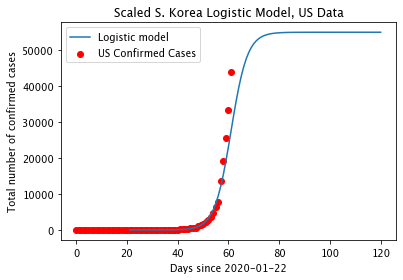

In [154]:
sk_day_offset = 21
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
plt.scatter(x_us, y_us, color="red", label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+sk_day_offset, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled S. Korea Logistic Model, US Data')
plt.savefig('Scaled S. Korea Logistic Model, US Data.png')

plt.show()

#### Logistic Model China

In [155]:
#df_confirmed.loc[(df_confirmed['Country/Region'] == 'China') & (df_confirmed['Province/State'] == 'Hubei')]

In [156]:
min_cases = 0
df_china_hubei = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China') & (df_confirmed['Province/State'] == 'Hubei') & (df_confirmed['Cases'] >= min_cases)]
df_china_hubei = df_china_hubei['Cases'].to_frame('Cases').reset_index()[:]
df_china_hubei


,Date,Cases
0,2020-01-22,444
1,2020-01-23,444
2,2020-01-24,549
3,2020-01-25,761
4,2020-01-26,1058
...,...,...
57,2020-03-19,67800
58,2020-03-20,67800
59,2020-03-21,67800
60,2020-03-22,67800


China Hubei Model

In [157]:
df = df_china_hubei['Cases'].to_frame('Cases').reset_index()[:]
df
x_ch_hb = df.index
y_ch_hb = df['Cases']
fit = curve_fit(logistic_model,x_ch_hb,y_ch_hb,p0=[2,25,100000])

popt_ch_hb = fit[0] # optimized parameters
pcov_ch_hb = fit[1] # covariance matrix
           
a = popt_ch_hb[0]
b = popt_ch_hb[1]
c = popt_ch_hb[2]

print("a =", popt_ch_hb[0], "+/-", pcov_ch_hb[0,0]**0.5)
print("b =", popt_ch_hb[1], "+/-", pcov_ch_hb[1,1]**0.5)
print("c =", popt_ch_hb[2], "+/-", pcov_ch_hb[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_ch_hb : logistic_model(x_ch_hb,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)


a = 4.2586725182572716 +/- 0.14355942473800565
b = 18.691455511594782 +/- 0.1660148756378727
c = 67726.82160336255 +/- 383.8528627853705
errors [0.14355942473800565, 0.1660148756378727, 383.8528627853705]
Expected number of infected people at infection end: 67726.82 +/- 383.85
Infection peak in days from start: 18.69 +/- 0.17
infection_peak_date 2020-02-09T00:00:00.000000000
infection_peak_date_string
days end 66
infection_end_date_string 2020-03-28


China Hubei Plot

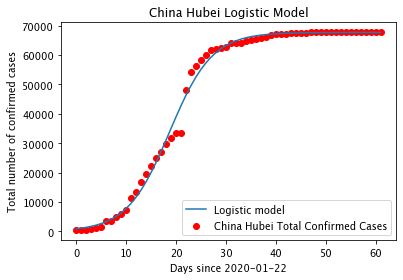

In [158]:
day_offset = 0
x_china = df_china_hubei.index
y_china = df_china_hubei['Cases']
x_ext = x_china
plt.scatter(x_china, y_china, color="red", label="China Hubei Total Confirmed Cases")

# Fitted logistic curve
plt.plot(x_china, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*1) for i in x_china], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('China Hubei Logistic Model')
plt.savefig('China Hubei Logistic Model.png')

plt.show()

In [159]:
us_china_hubei_pop_factor = pop_dict['US Total']/pop_dict['China Hubei']
us_china_hubei_pop_factor


4.378341944444444

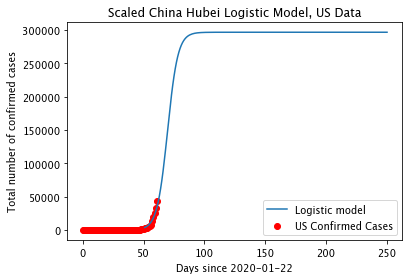

In [160]:
ch_hb_day_offset = 51
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(200)
plt.scatter(x_us, y_us, color="red", label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+ch_hb_day_offset, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled China Hubei Logistic Model, US Data')
plt.savefig('Scaled China Hubei Logistic Model, US Data.png')

plt.show()

Italy Model

In [161]:
min_cases = 0
df_italy = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Italy') & (df_confirmed['Cases'] >= min_cases)]
df_italy = df_italy['Cases'].to_frame('Cases').reset_index()[:]
df_italy


,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
57,2020-03-19,41035
58,2020-03-20,47021
59,2020-03-21,53578
60,2020-03-22,59138


In [162]:
df = df_italy['Cases'].to_frame('Cases').reset_index()[:]
df
x_it = df.index
y_it = df['Cases']
fit = curve_fit(logistic_model,x_it,y_it,p0=[2,25,100000])

popt_it = fit[0] # optimized parameters
pcov_it = fit[1] # covariance matrix
           
a = popt_it[0]
b = popt_it[1]
c = popt_it[2]

print("a =", popt_it[0], "+/-", pcov_it[0,0]**0.5)
print("b =", popt_it[1], "+/-", pcov_it[1,1]**0.5)
print("c =", popt_it[2], "+/-", pcov_it[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

infection_peak_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('infection_peak_date',infection_peak_date)

infection_peak_date_string = np.datetime_as_string(infection_peak_date, unit='D')
print('infection_peak_date_string')

d = int(fsolve(lambda x_it : logistic_model(x_it,a,b,c) - int(c),b))
print('days end', d)

infection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

infection_end_date_string = np.datetime_as_string(infection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)

a = 5.054194177974826 +/- 0.08879049109686833
b = 59.850860994401025 +/- 0.3657081599751459
c = 115429.06395662726 +/- 4316.328622505039
errors [0.08879049109686833, 0.3657081599751459, 4316.328622505039]
Expected number of infected people at infection end: 115429.06 +/- 4316.33
Infection peak in days from start: 59.85 +/- 0.37
infection_peak_date 2020-03-21T00:00:00.000000000
infection_peak_date_string
days end 132
infection_end_date_string 2020-06-02


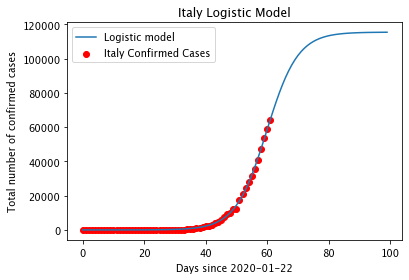

In [163]:
day_offset = 0
x_italy = df_italy.index
y_italy = df_italy['Cases']
x_ext = np.arange(100)
plt.scatter(x_italy, y_italy, color="red", label="Italy Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*1) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Italy Logistic Model')
plt.savefig('Italy Logistic Model.png')
plt.show()

In [164]:
italy_china_hubei_pop_factor = pop_dict['US Total']/pop_dict['China Hubei']
italy_china_hubei_pop_factor

4.378341944444444

In [165]:
us_italy_pop_factor = pop_dict['US Total']/pop_dict['Italy']
us_italy_pop_factor

5.474572517872682

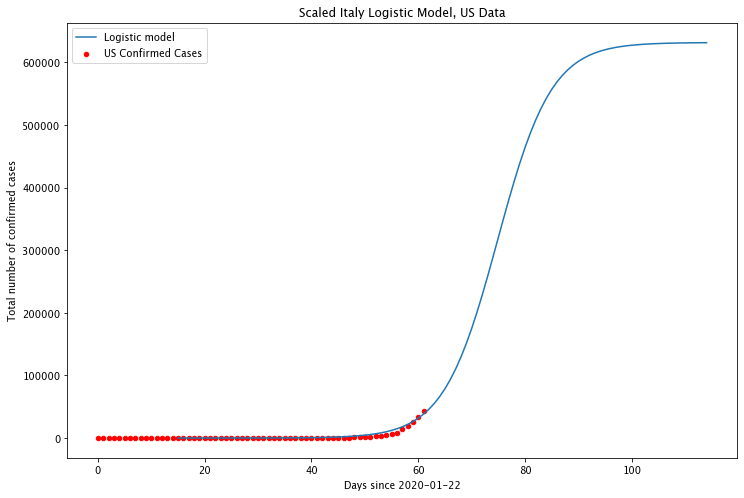

In [166]:
italy_day_offset_day_offset = 15
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)

plt.figure(figsize=(12,8))
plt.scatter(x_us, y_us, color="red", marker='o', s=20, label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+italy_day_offset_day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Scaled Italy Logistic Model, US Data')
plt.savefig('Scaled Italy Logistic Model, US Data.png')
plt.show()

US Model

In [167]:
df = df_us['Cases'].to_frame('Cases').reset_index()[:]
df.head()

,index,Cases
0,0,1
1,1,1
2,2,2
3,3,2
4,4,5


In [168]:
df = df_us['Cases'].to_frame('Cases').reset_index()[:]
df
x_us = df.index
y_us = df['Cases']
fit = curve_fit(logistic_model,x_us,y_us,p0=[2,25,100000])

popt_us = fit[0] # optimized parameters
pcov_us = fit[1] # covariance matrix
           
a = popt_us[0]
b = popt_us[1]
c = popt_us[2]

print("a =", popt_us[0], "+/-", pcov_us[0,0]**0.5)
print("b =", popt_us[1], "+/-", pcov_us[1,1]**0.5)
print("c =", popt_us[2], "+/-", pcov_us[2,2]**0.5)

errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
print('errors', errors)

print('Expected number of infected people at infection end:', round(c,2), '+/-', round(errors[2],2))
print('Infection peak in days from start:', round(b,2), '+/-', round(errors[1],2))

us_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(b,2)),'D')
print('us_inflection_date',us_inflection_date)

us_inflection_date_string = np.datetime_as_string(us_inflection_date, unit='D')
print('us_inflection_date_string', us_inflection_date_string)

d = int(fsolve(lambda x_it : logistic_model(x_it,a,b,c) - int(c),b))
print('days end', d)

us_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(d,2)),'D')

us_inflection_end_date_string = np.datetime_as_string(us_inflection_end_date, unit='D')
print('infection_end_date_string', infection_end_date_string)

a = 2.7457348369256462 +/- 0.07417778088671104
b = 63.26882067961676 +/- 0.5606185271397649
c = 144035.6290338129 +/- 18820.155512947473
errors [0.07417778088671104, 0.5606185271397649, 18820.155512947473]
Expected number of infected people at infection end: 144035.63 +/- 18820.16
Infection peak in days from start: 63.27 +/- 0.56
us_inflection_date 2020-03-25T00:00:00.000000000
us_inflection_date_string 2020-03-25
days end 97
infection_end_date_string 2020-06-02


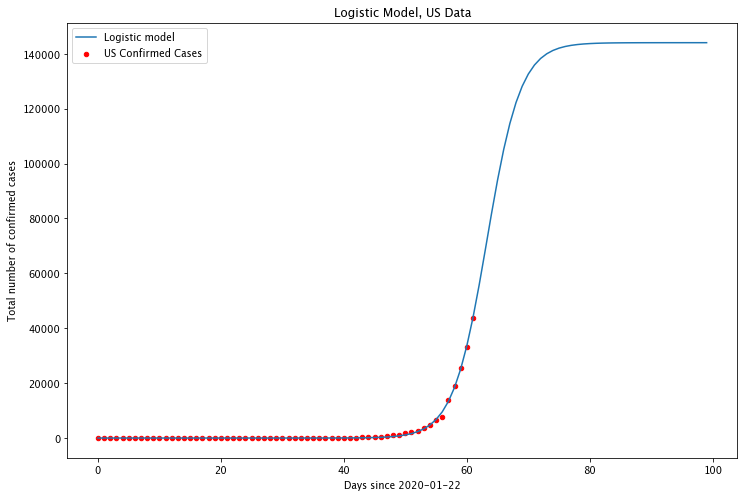

In [169]:
us_day_offset = 0
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)

plt.figure(figsize=(12,8))
plt.scatter(x_us, y_us, color="red", marker='o', s=20, label="US Confirmed Cases")

# Fitted logistic curve
plt.plot(x_ext+us_day_offset, [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1) for i in x_ext], label="Logistic model" )
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('Logistic Model, US Data')
plt.savefig('US Logistic Model, US Data.png')
plt.show()

Fit exponential function

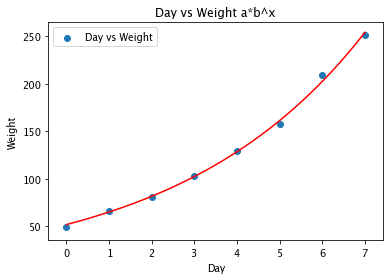

The equation of regression line is y=51.6062*1.2557^x


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

day = np.arange(0,8)
weight = np.sort( np.array([251,209,157,129,103,81,66,49]) )

def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
x_plot=np.linspace(0,7,100)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()
# equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')

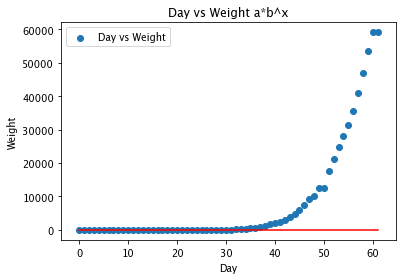

The equation of regression line is y=-0.0*0.0^x


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

day = np.arange(0,8)
weight = np.sort( np.array([251,209,157,129,103,81,66,49]) )

x_italy = df_italy.index
y_italy = df_italy['Cases']
x_ext = np.arange(100)

def func3(x, a, b):
    return a * b ** x
# popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
popt, pcov = curve_fit(func3, x_italy, y_italy, p0=[1, 1e-6])
# x_plot=np.linspace(0,7,100)
plt.plot(x_italy, func3(x_italy, *popt), 'r-')
plt.scatter(x_italy,y_italy,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()
# equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')

In [170]:
st = ''
s = 'Total US Cases South Korea Model ' + str( round(popt_sk[2]*us_sk_pop_factor) )
print(s)
st = s + '\n'
s = 'Total US Cases China Hubei Model ' + str( round(popt_ch_hb[2]*us_china_hubei_pop_factor) )
print(s)
st = st + s + '\n'
s = 'Total US Cases Italy Model ' + str( round(popt_it[2]*us_italy_pop_factor) )
print(s)
st = st + s + '\n'


Total US Cases South Korea Model 54850.0
Total US Cases China Hubei Model 296531.0
Total US Cases Italy Model 631925.0


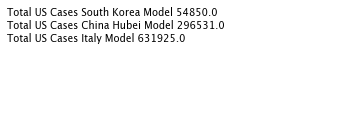

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,2))
plt.axis([0, 6, 0, 10], fontsize=18, frameon=False)
ax.axis('off')
plt.text(0, 10, st, ha='left', rotation=0, va='top', wrap=True)
plt.savefig('US Covid cases numbers.png')

plt.show()

In [193]:
sk_inflection = 61
sk_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(sk_inflection,2)),'D')
sk_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(sk_inflection*2,2)),'D')
sk_inflection_date_string = np.datetime_as_string(sk_inflection_date, unit='D')
st = ''
s = 'US Inflection Date South Korea Model' + ' ' + sk_inflection_date_string
st = st + '\n' + s
print(s)
sk_inflection_end_date_string = np.datetime_as_string(sk_inflection_end_date, unit='D')
s = 'US Spread Tail Off Date South Korea Model' + ' ' + sk_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()

ch_hb_inflection = 70
ch_hb_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(ch_hb_inflection,2)),'D')
ch_hb_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(ch_hb_inflection*2,2)),'D')
ch_hb_inflection_date_string = np.datetime_as_string(ch_hb_inflection_date, unit='D')
s = 'US Inflection Date China Hubei Model' + ' ' + ch_hb_inflection_date_string
st = st + '\n' + s
print(s)
ch_hb_inflection_end_date_string = np.datetime_as_string(ch_hb_inflection_end_date, unit='D')
s = 'US Spread Tail Off Date China Hubei Model' + ' ' + ch_hb_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()

it_inflection = 74
it_inflection_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(it_inflection,2)),'D')
it_inflection_end_date = np.datetime64(df_confirmed.index.values.min()) + np.timedelta64(int(round(it_inflection*2,2)),'D')
it_inflection_end_date_string = np.datetime_as_string(it_inflection_end_date, unit='D')
it_inflection_date_string = np.datetime_as_string(it_inflection_date, unit='D')
s = 'US Inflection Date Italy Model' + ' ' + it_inflection_date_string
st = st + '\n' + s
print(s)
it_inflection_end_date_string = np.datetime_as_string(it_inflection_end_date, unit='D')
s = 'US Inflection Date Italy Model' + ' ' + it_inflection_end_date_string
st = st + '\n' + s
print(s)
st = st + '\n' 
print()


US Inflection Date South Korea Model 2020-03-23
US Spread Tail Off Date South Korea Model 2020-05-23

US Inflection Date China Hubei Model 2020-04-01
US Spread Tail Off Date China Hubei Model 2020-06-10

US Inflection Date Italy Model 2020-04-05
US Inflection Date Italy Model 2020-06-18



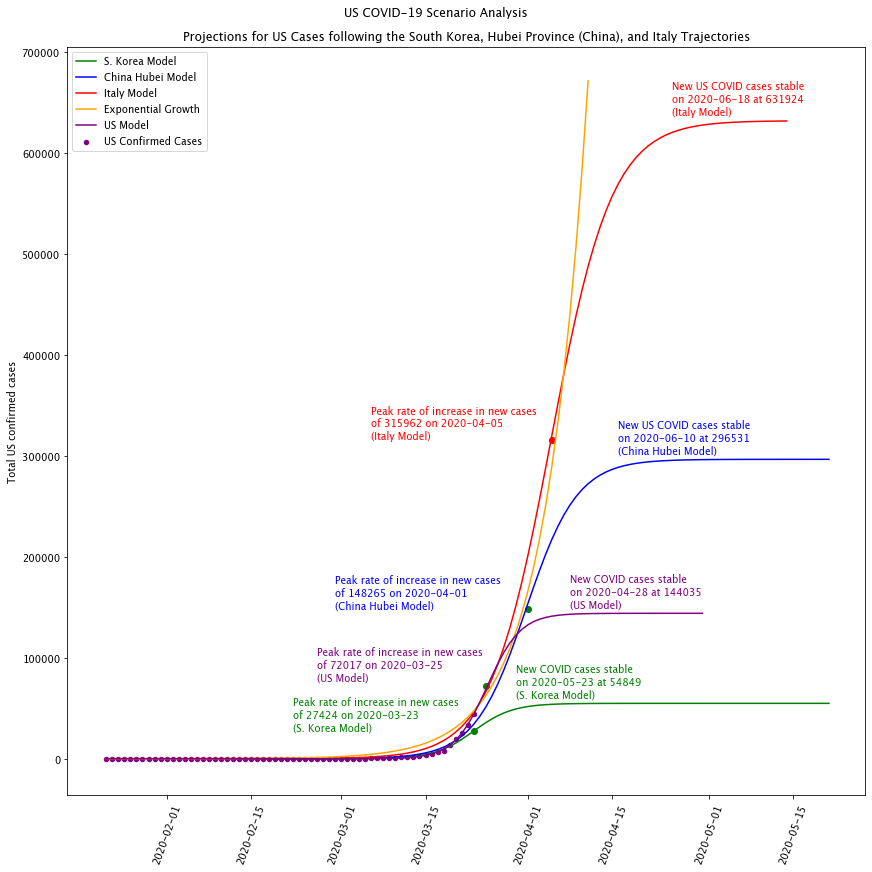

In [195]:
import datetime
from datetime import date
max_date = date.today()
max_date

italy_day_offset_day_offset = 14
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
x_ext_ch_hb = np.arange(100)-30
x_ext_exp = np.arange(81)

fig, ax = plt.subplots(figsize=(12,12), constrained_layout=True)
# plt.figure(figsize=(16,12))
degrees = 70
plt.xticks(rotation=degrees)

d = [np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext if i<len(x_us)]

# Fitted logistic curve
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+sk_day_offset,'D') for i in x_ext], [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="S. Korea Model", color="green")
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+ch_hb_day_offset,'D') for i in x_ext_ch_hb], [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext_ch_hb], label="China Hubei Model", color="blue"  )
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i+italy_day_offset_day_offset,'D') for i in x_ext], [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Italy Model", color="red"  )
plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext_exp], 1.15**(x_ext_exp+16), label="Exponential Growth", color="orange" )
plt.scatter(d, y_us, color="purple", marker='o', s=20, label="US Confirmed Cases")

plt.plot([np.datetime64('2020-01-22') + np.timedelta64(i,'D') for i in x_ext], [logistic_model(i, popt_us[0], popt_us[1], popt_us[2]*1) for i in x_ext], label="US Model", color="purple"  )

plt.legend()

x_text_offset = 10
y_text_offset = 5000
style = dict(size=10, color='red')
plt.scatter(it_inflection_date, popt_it[2]/2*us_italy_pop_factor, color='red')
do = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(-30,'D') )
ax.text(do, round(popt_it[2]/2*us_italy_pop_factor), 'Peak rate of increase in new cases \nof ' + str(int(popt_it[2]/2*us_italy_pop_factor)) + ' on '+ it_inflection_date_string + '\n(Italy Model)', **style)
do = np.datetime_as_string( np.datetime64(it_inflection_date_string) + np.timedelta64(20,'D') )
ax.text(do, round(popt_it[2]*us_italy_pop_factor)+y_text_offset, 'New US COVID cases stable\non ' + it_inflection_end_date_string + ' at ' + str(int(popt_it[2]*us_italy_pop_factor)) + '\n(Italy Model)', **style)

style = dict(size=10, color='blue')
plt.scatter(ch_hb_inflection_date, popt_ch_hb[2]/2*us_china_hubei_pop_factor, color='green')
do = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(-32,'D') )
ax.text(do, round(popt_ch_hb[2]/2*us_china_hubei_pop_factor), 'Peak rate of increase in new cases \nof ' + str(int(popt_ch_hb[2]/2*us_china_hubei_pop_factor)) + ' on '+ ch_hb_inflection_date_string + '\n(China Hubei Model)', **style)
do = np.datetime_as_string( np.datetime64(ch_hb_inflection_date_string) + np.timedelta64(15,'D') )
ax.text(do, round(popt_ch_hb[2]*us_china_hubei_pop_factor)+y_text_offset, 'New US COVID cases stable \non ' + ch_hb_inflection_end_date_string + ' at ' + str(int(popt_ch_hb[2]*us_china_hubei_pop_factor)) + '\n(China Hubei Model)', **style)

style = dict(size=10, color='green')
plt.scatter(sk_inflection_date, popt_sk[2]/2*us_sk_pop_factor, color='green')
do = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(-30,'D') )
ax.text(do, round(popt_sk[2]/2*us_sk_pop_factor), 'Peak rate of increase in new cases \nof ' + str(int(popt_sk[2]/2*us_sk_pop_factor)) + ' on '+ sk_inflection_date_string + '\n(S. Korea Model)', **style)
do = np.datetime_as_string( np.datetime64(sk_inflection_date_string) + np.timedelta64(7,'D') )
ax.text(do, round(popt_sk[2]*us_sk_pop_factor)+y_text_offset, 'New COVID cases stable \non ' + sk_inflection_end_date_string + ' at ' + str(int(popt_sk[2]*us_sk_pop_factor)) + '\n(S. Korea Model)', **style)

style = dict(size=10, color='purple')
plt.scatter(us_inflection_date, popt_us[2]/2*1, color='green')
do = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(-28,'D') )
ax.text(do, round(popt_us[2]/2*1)+y_text_offset, 'Peak rate of increase in new cases \nof ' + str(int(popt_us[2]/2*1)) + ' on '+ us_inflection_date_string + '\n(US Model)', **style)
do = np.datetime_as_string( np.datetime64(us_inflection_date_string) + np.timedelta64(14,'D') )
ax.text(do, round(popt_us[2]*1)+y_text_offset, 'New COVID cases stable \non ' + us_inflection_end_date_string + ' at ' + str(int(popt_us[2]*1)) + '\n(US Model)', **style)

us_inflection_end_date_string

# ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="angle3,angleA=0,angleB=-90"));

# plt.xlabel("Days since " + min_date)
plt.ylabel("Total US confirmed cases")
plt.suptitle('US COVID-19 Scenario Analysis')
plt.title('Projections for US Cases following the South Korea, Hubei Province (China), and Italy Trajectories')
plt.savefig('Projections for US Cases following the South Korea, Hubei Province (China), and Italy Trajectories.png')
plt.show()

In [183]:
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white

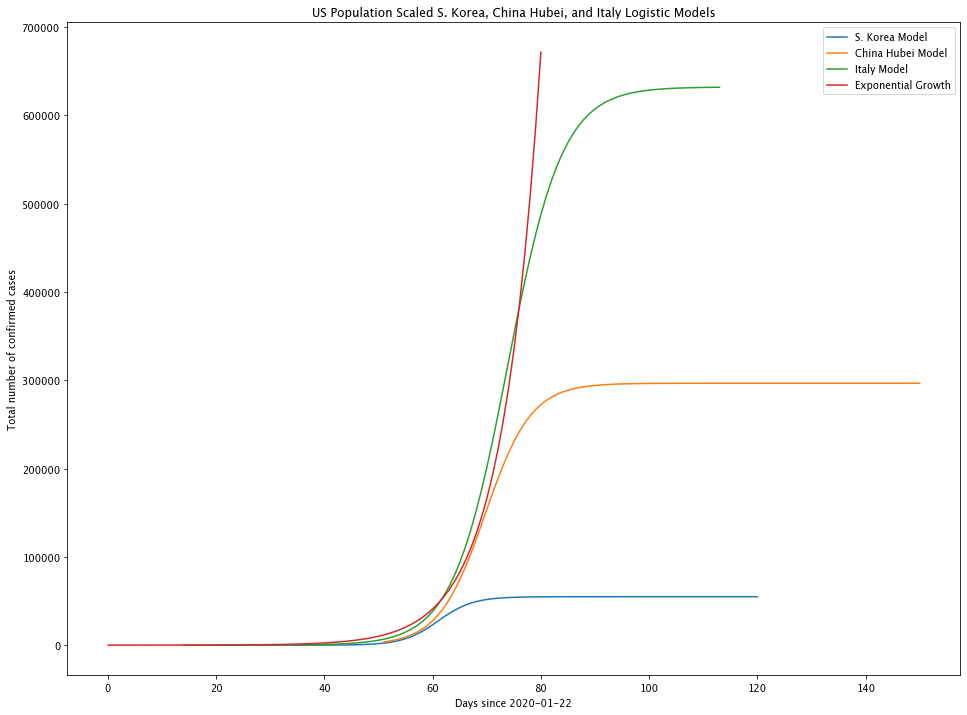

In [184]:
day_offset = 17
x_us = df_us.index
y_us = df_us['Cases']
x_ext = np.arange(100)
plt.figure(figsize=(16,12))

# Fitted logistic curve
plt.plot(x_ext+sk_day_offset, [logistic_model(i, popt_sk[0], popt_sk[1], popt_sk[2]*us_sk_pop_factor) for i in x_ext], label="S. Korea Model" )
plt.plot(x_ext+ch_hb_day_offset, [logistic_model(i, popt_ch_hb[0], popt_ch_hb[1], popt_ch_hb[2]*us_china_hubei_pop_factor) for i in x_ext], label="China Hubei Model" )
plt.plot(x_ext+italy_day_offset_day_offset, [logistic_model(i, popt_it[0], popt_it[1], popt_it[2]*us_italy_pop_factor) for i in x_ext], label="Italy Model" )
plt.plot(x_ext_exp, 1.15**(x_ext_exp+16), label="Exponential Growth")
plt.legend()
plt.xlabel("Days since " + min_date)
plt.ylabel("Total number of confirmed cases")
plt.title('US Population Scaled S. Korea, China Hubei, and Italy Logistic Models')
plt.savefig('US Population Scaled S. Korea, China Hubei, and Italy Logistic Models.png')
plt.show()

In [ ]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)